## MNIST (Modified National Institute of Standards and Technology database)

__In this notebook, we will create a neural network to recognize handwritten digits from the famous MNIST dataset.__

>We will experiment with two different networks for this task.The first one will be a multi-layer perceptron (MLP), which is a standard type of feedforward neural network with fully-connected layers of weights, and the second will be a convolutional neural network (CNN), which takes advantage of the inherently two-dimensional spatial geometry of the input images.

> **the MNIST dataset and printing a short description of its contents.**

In [8]:
import os
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from PIL import Image


# Mnist Class

class Mnist():
    img_size = 784
    img_dim = (1, 28, 28)
    weights_file_name = 'sample_weight.pkl'

    def __init__(self):
        self.network = None

    def init_network(self):
        with open(self.weights_file_name, 'rb') as f:
            self.network = pickle.load(f)

    def sigmoid(self, a):
        return 1 / (1 + np.exp(-a))

    def softmax(self, a):
        c = np.max(a)
        exp_a = np.exp(a - c)
        sum_exp_a = np.sum(exp_a)
        y = exp_a / sum_exp_a
        return y

    def predict(self, x):
        w1, w2, w3 = self.network['W1'], self.network['W2'], self.network['W3']
        b1, b2, b3 = self.network['b1'], self.network['b2'], self.network['b3']
        a1 = np.dot(x, w1) + b1
        z1 = self.sigmoid(a1)

        a2 = np.dot(z1, w2) + b2
        z2 = self.sigmoid(a2)

        a3 = np.dot(z2, w3) + b3
        # z3 = sigmoid(a3)
        y = self.softmax(a3)
        return y


In [9]:
#Creating Mnist class object
mnist=Mnist()
path = glob.glob("*.jpg")
fnl_image=[]
predicted_nums=[]
image2display=[]
for img in path:
    n=cv2.imread(img)
    # Replace this with the path to your image
    n=cv2.resize(n, (28, 28))
    predicted_nums.append(img[:1])
    image2display.append(n)
    img_array = np.asarray(n)
    image = cv2.cvtColor(img_array , cv2.COLOR_BGR2GRAY) #(28, 28)
    image = image / 255
# get the center of the camera image in a square shape
    image = image.reshape(1, 784)
    fnl_image.append(image)

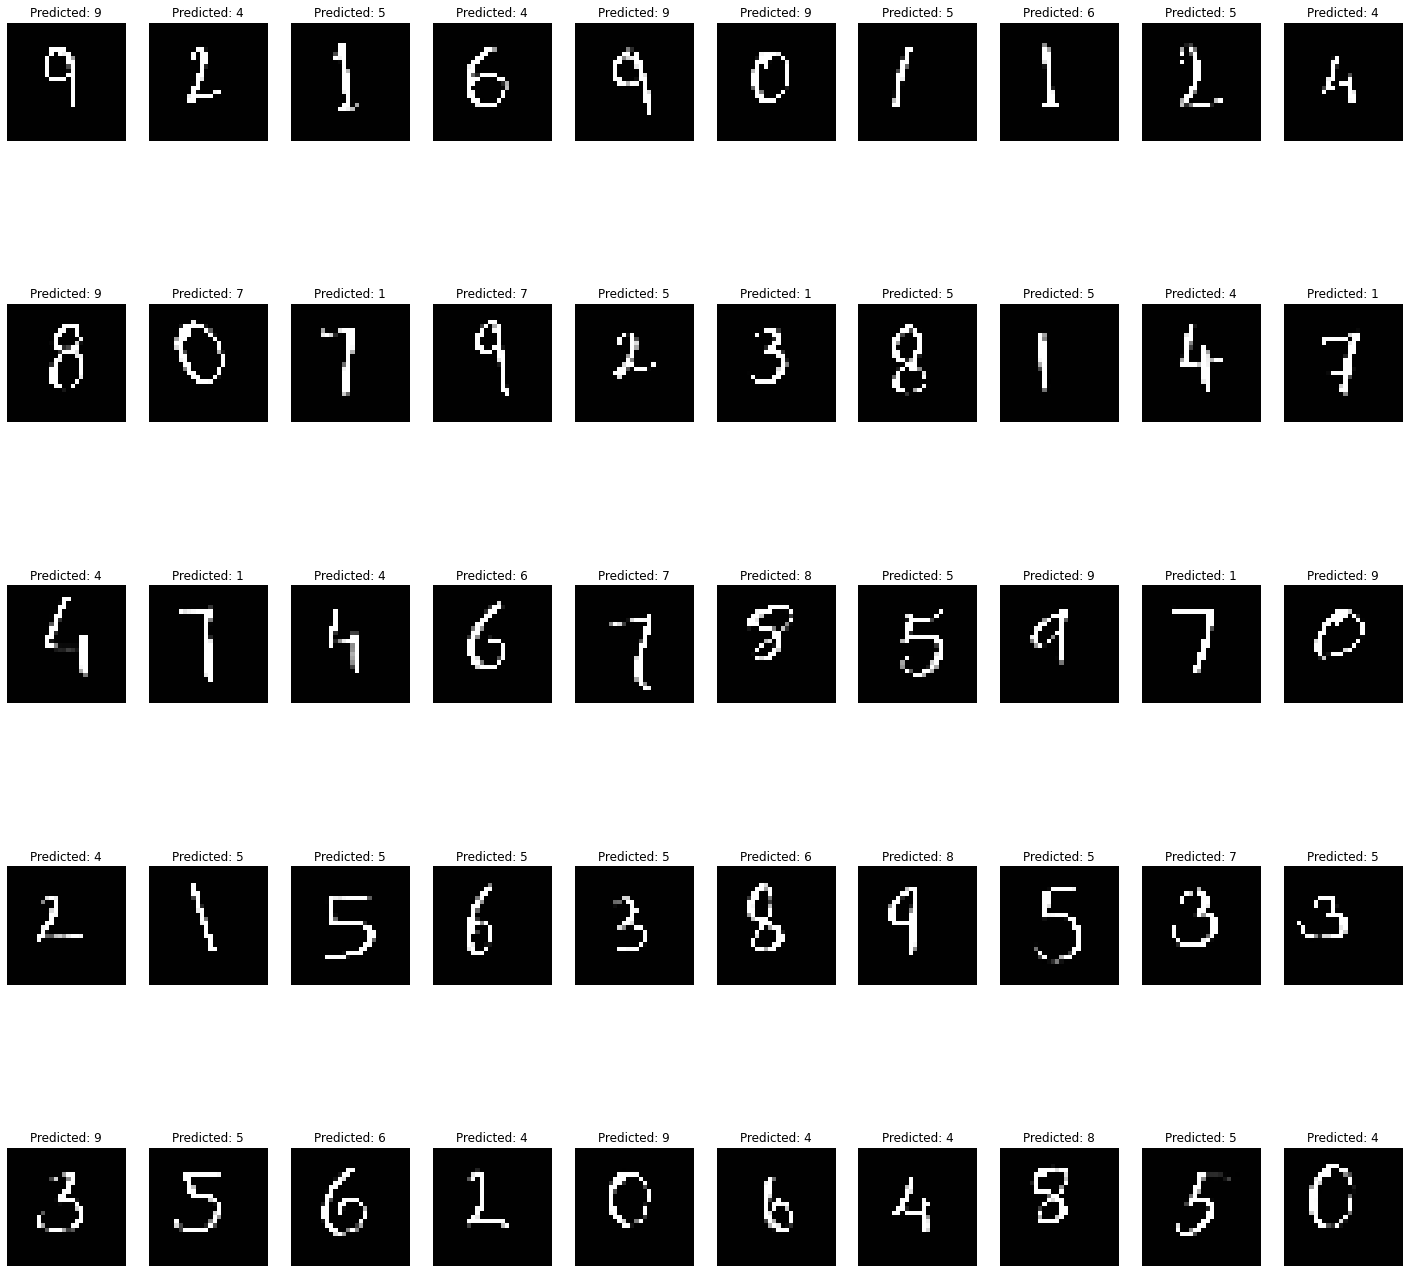

In [10]:
mnist.init_network()
plt.figure(figsize=(25,25)) # specifying the overall grid size
y_pred=[]
for i in range(50):
    plt.subplot(5,10,i+1) 
# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
    plt.imshow(image2display[i])
    plt.axis('off')
    y=mnist.predict(fnl_image[i])
    predicted_num=np.argmax(y)
    y_pred.append(predicted_num)
    certainity=np.max(y)
    plt.title('Predicted: {}'.format(predicted_num))

plt.show()